In [10]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import numpy as np

In [3]:
tickers = [
    'PETR4.SA', 'VALE3.SA', 'ITUB4.SA', 'BBDC4.SA', 'ABEV3.SA',
    'BBAS3.SA', 'PETR3.SA', 'SUZB3.SA', 'WEGE3.SA', 'PRIO3.SA',
    'GGBR4.SA', 'CSNA3.SA', 'CMIG4.SA', 'RENT3.SA', 'RADL3.SA',
    'HAPV3.SA', 'EMBR3.SA', 'ENEV3.SA', 'KLBN11.SA', 'MRFG3.SA'
]

In [4]:
# Período de análise
start_date = "2020-01-01"
end_date = "2024-12-31"

# Baixar dados
data = yf.download(tickers, start=start_date, end=end_date)['Close']

C:\Users\SoftwareDATA\AppData\Local\Temp\ipykernel_29048\2661085849.py:6: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(tickers, start=start_date, end=end_date)['Close']
[*********************100%***********************]  20 of 20 completed


In [5]:
returns = data.pct_change().dropna()
print("\nRetornos diários (primeiras 5 linhas):")
print(returns.head())
print("\nInformações sobre os retornos (após dropna):")
returns.info()


Retornos diários (primeiras 5 linhas):
Ticker      ABEV3.SA  BBAS3.SA  BBDC4.SA  CMIG4.SA  CSNA3.SA  EMBR3.SA  \
Date                                                                     
2020-01-03 -0.014062 -0.001673  0.000506 -0.010807 -0.007488  0.010396   
2020-01-06  0.004754 -0.013219 -0.017862  0.013838 -0.024691 -0.001470   
2020-01-07  0.002103 -0.007547 -0.017372  0.036638  0.000000  0.005888   
2020-01-08 -0.004722 -0.009126 -0.015469  0.027720 -0.001407 -0.008293   
2020-01-09 -0.007907 -0.020338 -0.015994 -0.008092 -0.010563 -0.006886   

Ticker      ENEV3.SA  GGBR4.SA  HAPV3.SA  ITUB4.SA  KLBN11.SA  MRFG3.SA  \
Date                                                                      
2020-01-03  0.009348 -0.016378  0.042294 -0.010518   0.024338  0.021869   
2020-01-06  0.025525 -0.002449 -0.030834 -0.014882   0.008976 -0.018482   
2020-01-07 -0.007489  0.015710 -0.027479 -0.023200   0.003140  0.030723   
2020-01-08 -0.004661  0.003866 -0.020577 -0.016294   0.010955  0.0

In [6]:
scaler = StandardScaler()
returns_scaled = scaler.fit_transform(returns)

print("\nRetornos padronizados (primeiras 5 linhas do array numpy):")
print(returns_scaled[:5])


Retornos padronizados (primeiras 5 linhas do array numpy):
[[-0.7436735  -0.09188333  0.03228983 -0.52182559 -0.23307887  0.26988307
   0.39685543 -0.64538999  1.15845206 -0.5257989   1.22081764  0.65600715
  -0.89999513 -0.33437598  1.4188428  -1.15202598 -0.49081677 -0.17993862
  -0.33761357 -0.5852645 ]
 [ 0.25396861 -0.58927073 -0.75028063  0.5621733  -0.73515091 -0.08538888
   1.10127975 -0.11977645 -0.81089071 -0.74154973  0.43001225 -0.6317667
   1.06603101  0.37282959  0.4427661  -1.01855197 -0.39552461 -0.10525742
  -0.27725489  0.05683083]
 [ 0.1133996  -0.3449219  -0.72942884  1.56500495 -0.01454843  0.13491501
  -0.33629152  0.56542967 -0.72055193 -1.15281981  0.12959735  0.93859273
  -0.51951007 -0.18389296 -0.02243132 -0.71347757  0.31849913  0.52954438
   0.28062771  0.27238238]
 [-0.248457   -0.41292211 -0.64833439  1.17274508 -0.05559686 -0.28966503
  -0.21312841  0.11852296 -0.53468768 -0.81137002  0.53189239  0.75593944
  -0.61037421 -0.26521654 -0.57645875  0.67144

In [8]:
pca = PCA()
pca.fit(returns_scaled)

,n_components,None
,copy,True
,whiten,False
,svd_solver,'auto'
,tol,0.0
,iterated_power,'auto'
,n_oversamples,10
,power_iteration_normalizer,'auto'
,random_state,None


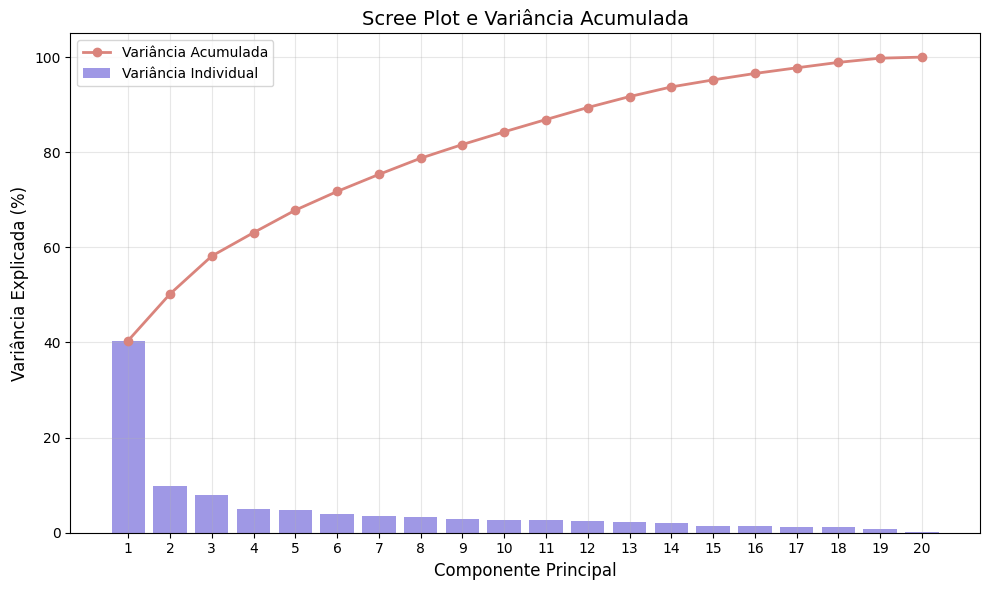


Variância explicada por cada componente principal (primeiros 5):
[40.41  9.79  7.98  4.92  4.73]

Variância acumulada pelos primeiros 5 componentes principais:
[40.41 50.2  58.17 63.09 67.82]

Número de componentes necessários para explicar pelo menos 80% da variância: 9


In [11]:
var_exp = pca.explained_variance_ratio_ * 100
cum_var_exp = np.cumsum(var_exp)

plt.figure(figsize=(10, 6))
plt.bar(range(1, len(var_exp)+1), var_exp, color='#766CDB', alpha=0.7, label='Variância Individual')
plt.plot(range(1, len(cum_var_exp)+1), cum_var_exp, color='#DA847C',
         marker='o', linewidth=2, label='Variância Acumulada')

plt.xlabel('Componente Principal', fontsize=12)
plt.ylabel('Variância Explicada (%)', fontsize=12)
plt.title('Scree Plot e Variância Acumulada', fontsize=14)
plt.xticks(range(1, len(var_exp)+1))
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

print("\nVariância explicada por cada componente principal (primeiros 5):")
print(var_exp[:5].round(2))
print("\nVariância acumulada pelos primeiros 5 componentes principais:")
print(cum_var_exp[:5].round(2))

# Análise: Quantos componentes explicam X% da variância?
percentil_variancia = 80 # Exemplo: 80%
num_comp_para_percentil = np.where(cum_var_exp >= percentil_variancia)[0][0] + 1
print(f"\nNúmero de componentes necessários para explicar pelo menos {percentil_variancia}% da variância: {num_comp_para_percentil}")